In [47]:
from time import time
from loreal_poc.dataloaders.loaders import DataLoader300W
from loreal_poc.dataloaders.wrappers import CroppedDataLoader, CachedDataLoader
from loreal_poc.marks.facial_parts import FacialParts
from loreal_poc.visualisation.draw import draw_marks
from loreal_poc.tests.performance import *
from loreal_poc.marks.utils import compute_d_outers
from loreal_poc.models.base import PredictionResult
import numpy as np

In [48]:
ds = DataLoader300W(dir_path="300W/sample", batch_size=2)

## Visualizing the `radius_limit` 
`radius_limit` is defined as a fraction of the outer canthal distance (i.e. the distance between left and right eyes)

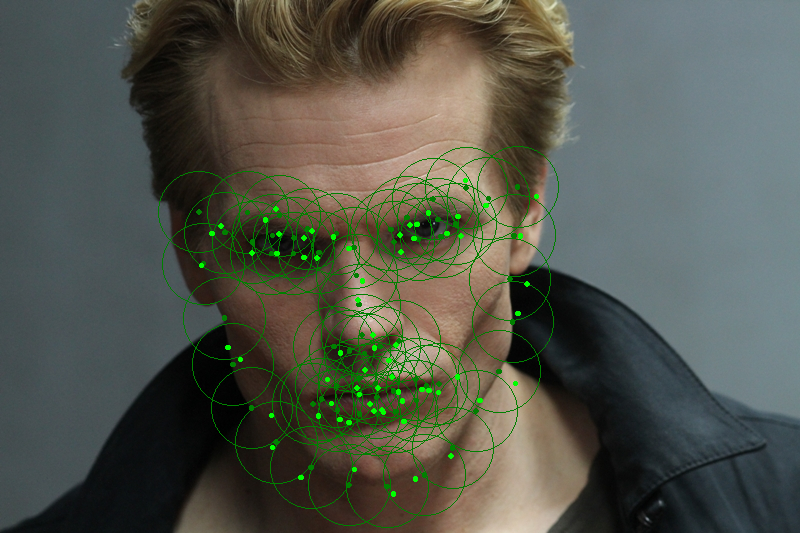

In [49]:
img_idx = 1
image, marks, meta = next(iter(ds))
noisy_marks = marks + 7 * np.random.randn(*marks.shape)

noisy_preds = PredictionResult(noisy_marks)


radius_limit = 0.2
d_outers = compute_d_outers(marks)
noisy_marks[:, ::2] += 0.05 * d_outers
failed_nerfs = NERFMarks.get(noisy_preds, marks, radius_limit=radius_limit)
colors_marks = ["red" if nerf else "green" for nerf in failed_nerfs[img_idx]]
colors_preds = [(255, 127, 0) if nerf else (0, 255, 0) for nerf in failed_nerfs[img_idx]]
draw_marks(
    image[img_idx],
    [marks[img_idx], noisy_marks[img_idx]],
    [colors_marks, colors_preds],
    [False, False],
    radius_limits=[d_outers[img_idx] * radius_limit, None],
)

## Visualizing failing marks predictions 


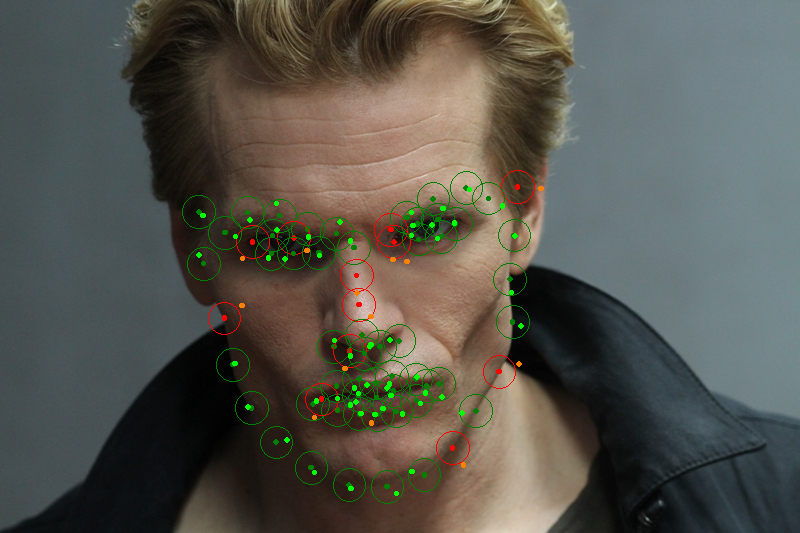

In [62]:
img_idx = 1
image, marks, meta = next(iter(ds))
noisy_marks = marks + 7 * np.random.randn(*marks.shape)

noisy_preds = PredictionResult(noisy_marks)


radius_limit = 0.08
d_outers = compute_d_outers(marks)
noisy_marks[:, ::2] += 0.05 * d_outers
failed_nerfs = NERFMarks.get(noisy_preds, marks, radius_limit=radius_limit)
colors_marks = ["red" if nerf else "green" for nerf in failed_nerfs[img_idx]]
colors_preds = [(255, 127, 0) if nerf else (0, 255, 0) for nerf in failed_nerfs[img_idx]]
draw_marks(
    image[img_idx],
    [marks[img_idx], noisy_marks[img_idx]],
    [colors_marks, colors_preds],
    [False, False],
    radius_limits=[d_outers[img_idx] * radius_limit, None],
)

## Landmark-level available metrics

In [63]:
NEs.get(noisy_preds, marks)

array([[0.12603493, 0.04542723, 0.11973379, 0.03051126, 0.17592175,
        0.09046433, 0.134156  , 0.11870602, 0.0587902 , 0.03715679,
        0.11886029, 0.07296799, 0.08366873, 0.09118049, 0.01861199,
        0.06057736, 0.10345607, 0.12110831, 0.10397287, 0.13771707,
        0.06171416, 0.0962862 , 0.15224382, 0.10341123, 0.13253413,
        0.10992899, 0.26903386, 0.11862492, 0.12587347, 0.09338929,
        0.05959163, 0.03803785, 0.08346152, 0.08220763, 0.0959019 ,
        0.05686466, 0.13968853, 0.06880553, 0.0707382 , 0.06711201,
        0.18790573, 0.1178201 , 0.16339422, 0.03911309, 0.06933406,
        0.06068824, 0.10579939, 0.07534968, 0.11209097, 0.12689279,
        0.13506218, 0.07473839, 0.18896627, 0.10070566, 0.13919826,
        0.11641103, 0.09184416, 0.02009261, 0.06691943, 0.10132085,
        0.14877135, 0.03150198, 0.18326443, 0.02537873, 0.13681968,
        0.09350488, 0.127335  , 0.03623708],
       [0.02777615, 0.04851998, 0.10570663, 0.01121761, 0.01933919,
   

In [53]:
NERFMarks.get(noisy_preds, marks, radius_limit=0.05)

array([[1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
        1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 0.]])

In [65]:
NERFImagesMean.get(noisy_preds, marks, radius_limit=0.05)

array([0.5, 0. , 1. , 0. , 0.5, 1. , 0.5, 0.5, 1. , 0.5, 1. , 1. , 1. ,
       0.5, 0.5, 0.5, 1. , 1. , 0.5, 1. , 0.5, 1. , 1. , 0.5, 1. , 0.5,
       1. , 0.5, 1. , 1. , 1. , 0. , 1. , 1. , 0.5, 0.5, 1. , 0.5, 1. ,
       0.5, 0.5, 0.5, 1. , 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. , 0.5,
       0.5, 0.5, 1. , 0.5, 0.5, 0. , 0.5, 1. , 1. , 0. , 1. , 0. , 0.5,
       0.5, 1. , 0. ])

In [66]:
NERFImagesStd.get(noisy_preds, marks, radius_limit=0.05)

array([0.5, 0. , 0. , 0. , 0.5, 0. , 0.5, 0.5, 0. , 0.5, 0. , 0. , 0. ,
       0.5, 0.5, 0.5, 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0.5, 0. , 0.5,
       0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0.5, 0. ,
       0.5, 0.5, 0.5, 0. , 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0.5,
       0.5, 0.5, 0. , 0.5, 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5,
       0.5, 0. , 0. ])

In [67]:
NERFMarksMean.get(noisy_preds, marks, radius_limit=0.05)

array([0.85294118, 0.44117647])

In [68]:
NERFMarksStd.get(noisy_preds, marks, radius_limit=0.05)

array([0.35416455, 0.49652774])

In [55]:
NERFImages.get(noisy_preds, marks, radius_limit=0.5, failed_mark_ratio=0.1)

0.0

In [56]:
NERFImages.get(noisy_preds, marks, radius_limit=0.05, failed_mark_ratio=0.7)

0.5